<a href="https://colab.research.google.com/github/Sakshi-2149/OIBSIP_Project2/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.rcParams.update({
    "figure.figsize": (10, 5),
    "font.size": 12
})


In [11]:
from google.colab import files
files.upload()


Saving ifood_df.csv to ifood_df (1).csv


{'ifood_df (1).csv': b'Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall\n58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0\n46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0\n71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0\n26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0\n58293.0,1,0,94,173,43,118,46,27,15,5

In [12]:
df = pd.read_csv('/content/ifood_df.csv')

print("Dataset Loaded Successfully")
display(df.head())


Dataset Loaded Successfully


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [13]:
df.info()
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [14]:
df = df.dropna().reset_index(drop=True)


In [15]:
monetary_cols = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

df['Monetary'] = df[monetary_cols].sum(axis=1)


In [16]:
frequency_cols = [
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases'
]

df['Frequency'] = df[frequency_cols].sum(axis=1)


In [17]:
features = df[['Recency', 'Frequency', 'Monetary']]
display(features.head())


,Recency,Frequency,Monetary
0,58,22,1617
1,38,4,27
2,26,20,776
3,26,6,53
4,94,14,422


In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


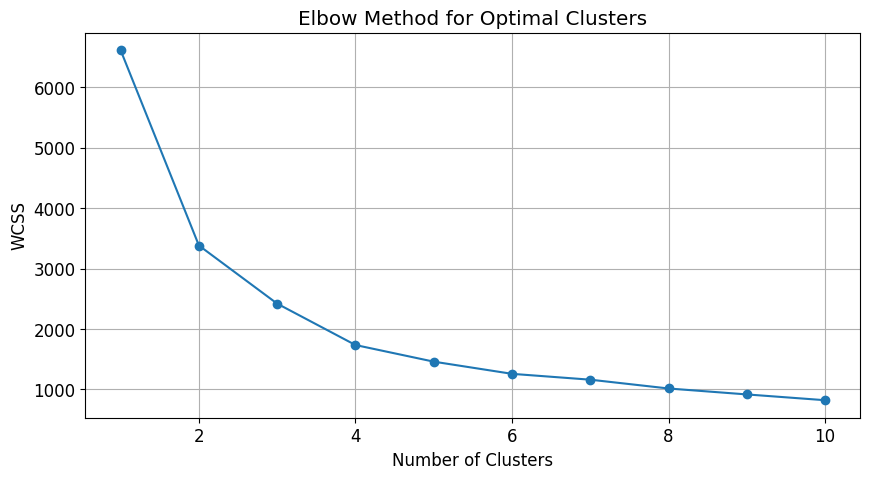

In [19]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

df[['Recency', 'Frequency', 'Monetary', 'Cluster']].head()


,Recency,Frequency,Monetary,Cluster
0,58,22,1617,0
1,38,4,27,2
2,26,20,776,0
3,26,6,53,2
4,94,14,422,1


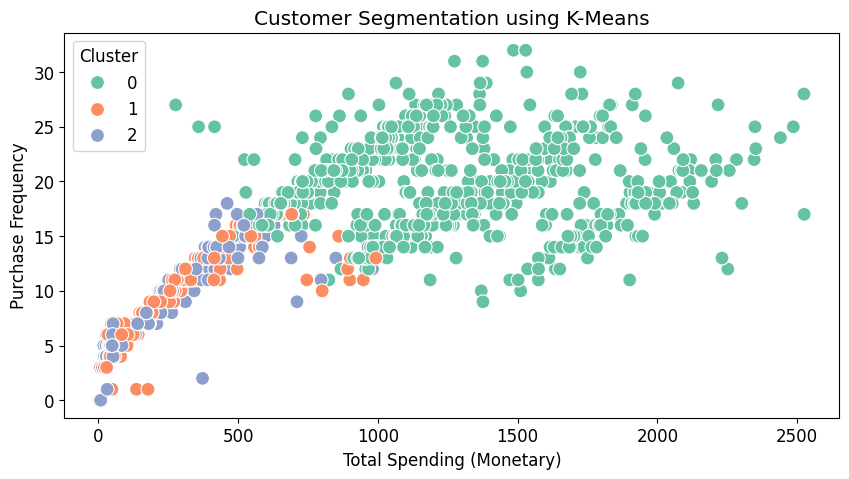

In [21]:
sns.scatterplot(
    data=df,
    x='Monetary',
    y='Frequency',
    hue='Cluster',
    palette='Set2',
    s=100
)

plt.title("Customer Segmentation using K-Means")
plt.xlabel("Total Spending (Monetary)")
plt.ylabel("Purchase Frequency")
plt.show()


In [22]:
cluster_summary = df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
display(cluster_summary)


,Recency,Frequency,Monetary
Cluster,,,
0,49.415842,19.773377,1222.975798
1,74.062595,7.500763,174.738931
2,22.831513,7.533541,174.575663


In [23]:
print("Cluster Insights:")
print("Cluster 0 → Low spending, infrequent customers")
print("Cluster 1 → Medium value, regular customers")
print("Cluster 2 → High value, loyal customers")


Cluster Insights:
Cluster 0 → Low spending, infrequent customers
Cluster 1 → Medium value, regular customers
Cluster 2 → High value, loyal customers
